In [100]:
# Standard library imports
import os
import random
from typing import List

# Third-party imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [101]:
# Base paths
PRED_MASK_DIR: str = "/home/ulixes/segmentation_cv/unet/nnUNet/nnUNet_results/Dataset001_PetSegmentation/nnUNetTrainer__nnUNetPlans__2d/fold_0/validation"
GT_MASK_DIR: str = "/home/ulixes/segmentation_cv/unet/nnUNet/nnUNet_raw/Dataset001_PetSegmentation/labelsTr"
IMAGE_DIR: str = "/home/ulixes/segmentation_cv/unet/nnUNet/nnUNet_raw/Dataset001_PetSegmentation/imagesTr"

# Get prediction mask filenames
pred_mask_files: List[str] = [f for f in os.listdir(PRED_MASK_DIR) if f.endswith(".png")]

# Display count
print(f"Found {len(pred_mask_files)} predicted mask files.")


Found 2331 predicted mask files.


In [102]:
def colorize_mask(mask: np.ndarray) -> np.ndarray:
    """
    Convert a segmentation mask with values {0,1,2} into an RGB color image.
    
    - 0 → black (0, 0, 0)
    - 1 → red   (255, 0, 0)
    - 2 → green (0, 255, 0)

    Args:
        mask (np.ndarray): 2D array of shape (H, W) with class values.

    Returns:
        np.ndarray: RGB image of shape (H, W, 3)

    Example:
        >>> color_mask = colorize_mask(np.array([[0, 1], [2, 1]]))
    """
    rgb_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    rgb_mask[mask == 1] = [255, 0, 0]    # Red for class 1
    rgb_mask[mask == 2] = [0, 255, 0]    # Green for class 2
    return rgb_mask


In [103]:
def visualize_image_triplets(
    pred_dir: str,
    gt_dir: str,
    img_dir: str,
    filenames: List[str],
) -> None:
    """
    Visualize the original image, ground truth mask, and predicted mask side-by-side.

    Args:
        pred_dir (str): Path to prediction masks.
        gt_dir (str): Path to ground truth masks.
        img_dir (str): Path to original images.
        filenames (List[str]): List of prediction mask filenames.
        seed (int): Random seed for reproducibility.

    Returns:
        None

    Example:
        >>> visualize_image_triplets(PRED_MASK_DIR, GT_MASK_DIR, IMAGE_DIR, pred_mask_files)
    """
    sample_files = random.sample(filenames, min(5, len(filenames)))

    for fname in sample_files:
        basename = fname.replace(".png", "")
        pred_path = os.path.join(pred_dir, fname)
        gt_path = os.path.join(gt_dir, fname)
        img_path = os.path.join(img_dir, f"{basename}_0000.png")

        # Load images
        pred_mask = np.array(Image.open(pred_path))
        gt_mask = np.array(Image.open(gt_path))
        image = np.array(Image.open(img_path).convert("RGB"))

        # Colorize masks
        colored_pred = colorize_mask(pred_mask)
        colored_gt = colorize_mask(gt_mask)

        # Create subplot
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        axs[0].imshow(image)
        axs[0].set_title(f"Original Image\n{basename}")
        axs[0].axis("off")

        axs[1].imshow(colored_gt)
        axs[1].set_title("Ground Truth")
        axs[1].axis("off")

        axs[2].imshow(colored_pred)
        axs[2].set_title("Prediction")
        axs[2].axis("off")

        plt.tight_layout()
        plt.show()


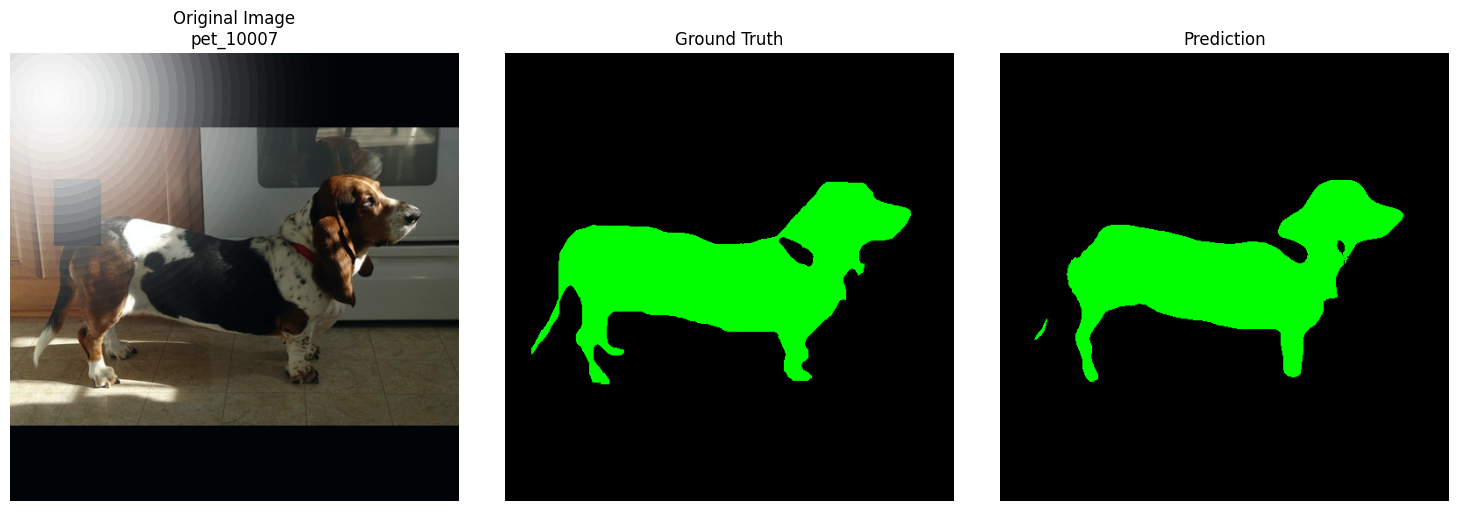

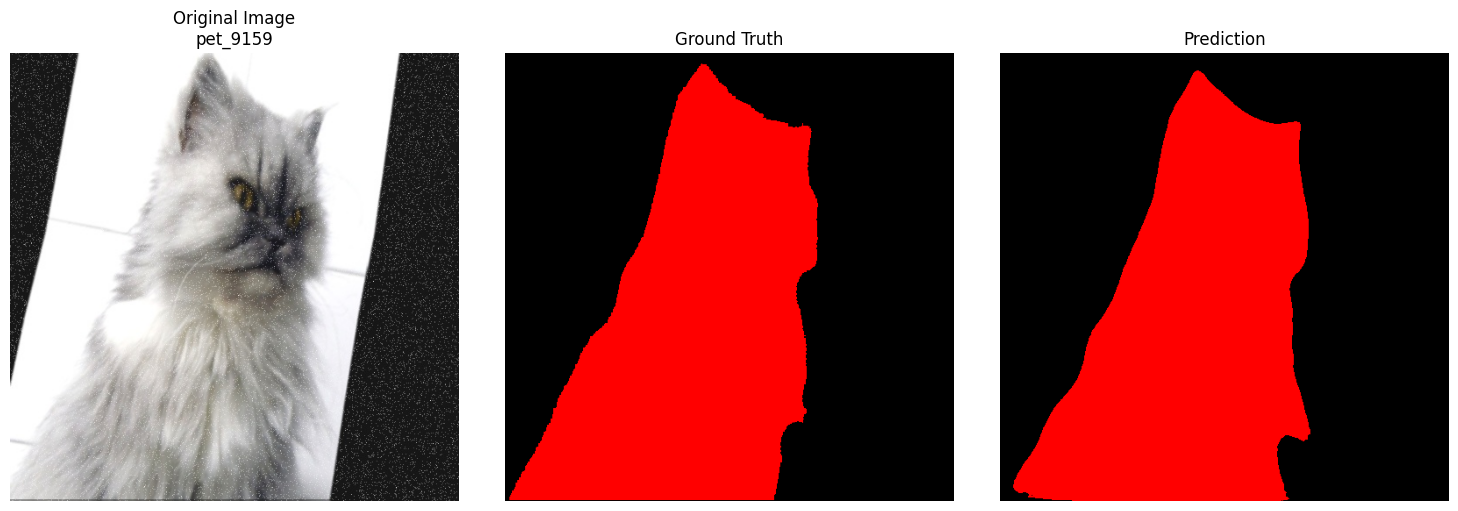

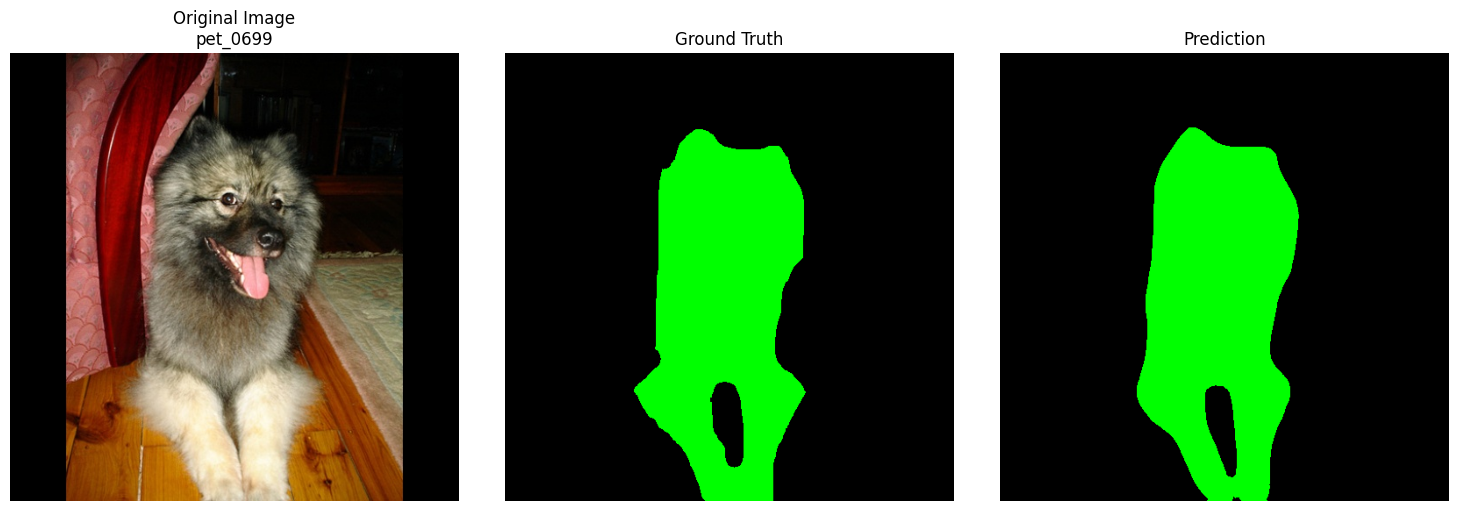

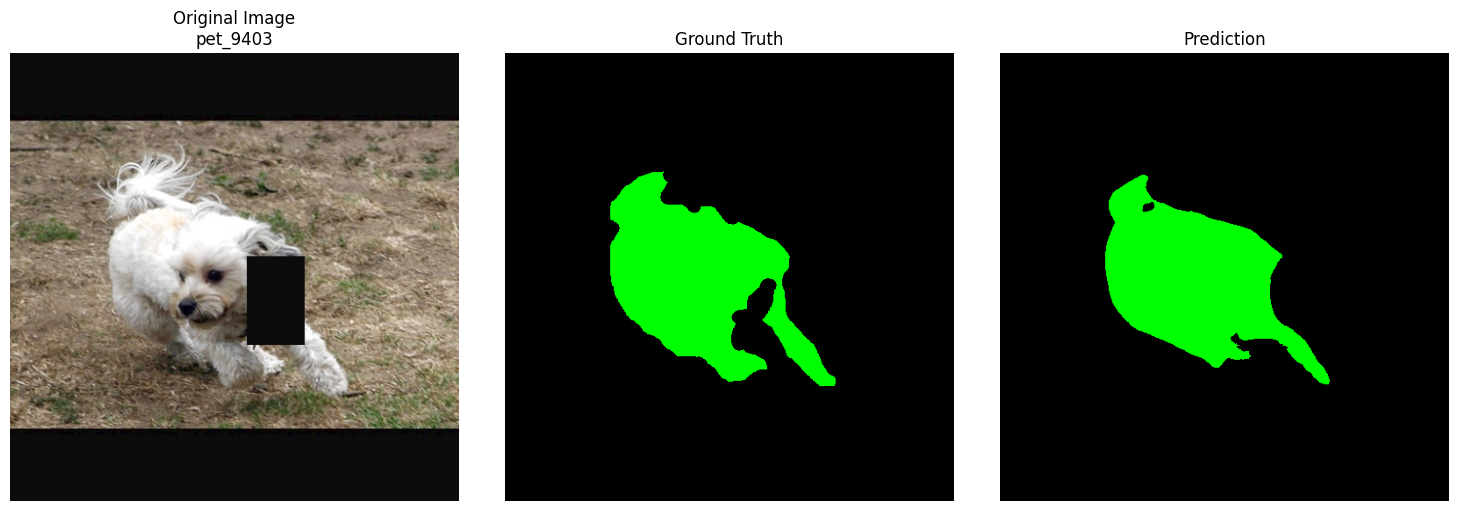

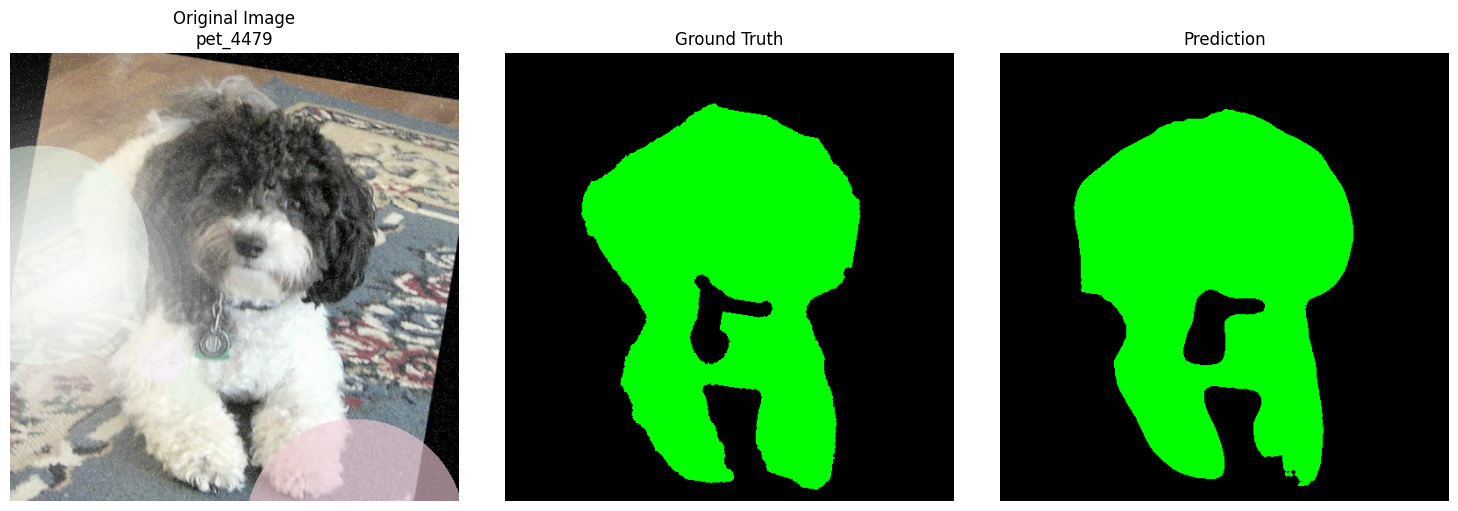

In [104]:
# Display 5 random triplets
visualize_image_triplets(
    pred_dir=PRED_MASK_DIR,
    gt_dir=GT_MASK_DIR,
    img_dir=IMAGE_DIR,
    filenames=pred_mask_files,
)
